In [1]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/pipelines/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

from bioomics import QueryComplex
from plot_seq import PlotSeq
from layout import Layout

src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [2]:
query = "select * from view_antibody;"
df = QueryComplex(True).list_data(query, True)
df['specie'] = df['specie'].map(lambda x: x.replace('_', ' '))
chain_types = {'H': 'Heavy', 'K': 'Kappa', 'L': 'Lambda',}
df['chain_type'] = df['chain_type'].map(lambda x: chain_types[x] if x in chain_types else x)
print(len(df))
df.head(3)

31529


,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,chain_id,model_no,chain_no,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,relative_pdb,pdb_group
0,IGKV8-21*01,Mus musculus,IGKV8-21,IGKV8,Kappa,3IJH,3IJH_0_A_0,0,A,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
1,IGHV7-3*02,Mus musculus,IGHV7-3,IGHV7,Heavy,3IJH,3IJH_0_B_0,0,B,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.1,29.0730,meta_chain_faa/3I/3IJH/3IJH_0_B_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_B_0.pdb,0.0
2,IGKV8-21*01,Mus musculus,IGKV8-21,IGKV8,Kappa,3IJH,3IJH_0_C_0,0,C,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.1,34.2494,meta_chain_faa/3I/3IJH/3IJH_0_C_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_C_0.pdb,0.0


In [3]:
df['specie'].value_counts()

specie
Homo sapiens             14462
Mus musculus              9073
Vicugna pacos             3278
Macaca mulatta            1348
Gorilla gorilla           1074
Pongo pygmaeus             595
Oryctolagus cuniculus      483
Pongo abelii               367
Rattus norvegicus          274
Bos taurus                 159
Macaca fascicularis        116
Lemur catta                110
Gallus gallus               75
Sus scrofa                  52
Mus spretus                 24
Canis lupus                 12
Mustela putorius             8
Felis catus                  7
Camelus dromedarius          5
Equus caballus               3
Capra hircus                 2
Ovis aries                   2
Name: count, dtype: int64

figure size: 11.4 x 8 cm


<Axes: >

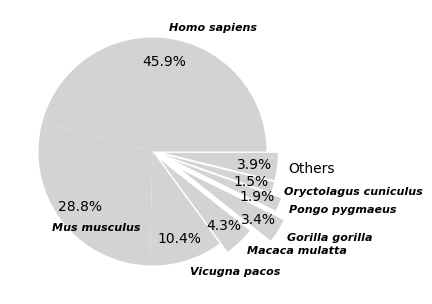

In [157]:
args = {'width_level': 2, 'height': 8}
fig, ax = Layout(args).one()

params = {'n': 7,
    'explode': [0, 0, 0, .1, .3, .2, .1, .1],
    'angle': 0,  'ha': 'left',
    'pctdistance':.8, 'labeldistance':1.1,
}
PlotSeq(df).pie_specie_counts(ax, params)

figure size: 11.4 x 8 cm


<Axes: >

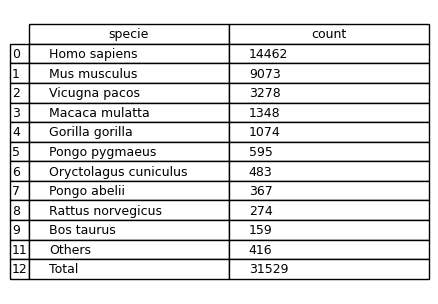

In [18]:
args = {'width_level': 2, 'height': 8}
fig, ax = Layout(args).one()

params = {'n': 10,}
PlotSeq(df).table_species(ax, params)

['Homo sapiens', 'Mus musculus']


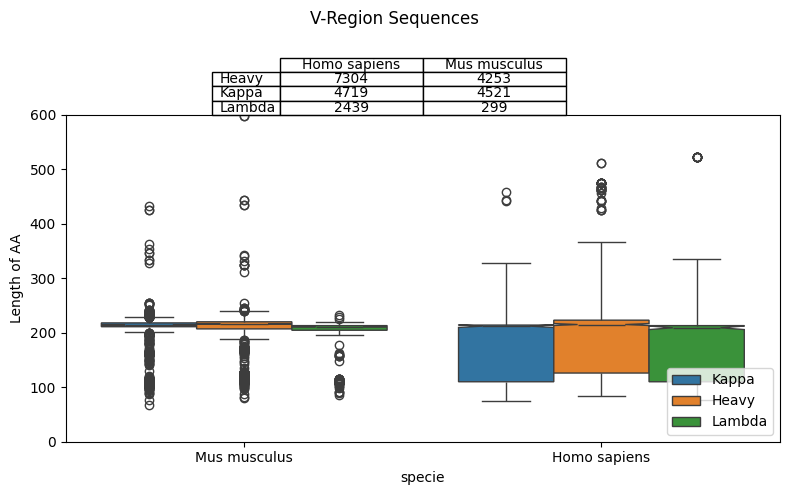

specie,Homo sapiens,Mus musculus
chain_type,,
Heavy,7304,4253
Kappa,4719,4521
Lambda,2439,299


In [21]:
PlotSeq(df).plot_summary(n=2)

### human

figure size: 8.5 x 5 cm
(14462, 19)


<Axes: xlabel='Chain of antibody', ylabel='Number of\ngene family'>

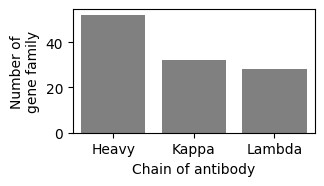

In [153]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).bar_gene_family(ax, params)

figure size: 8.5 x 5 cm
(14462, 19)


<Axes: xlabel='Chain of antibody', ylabel='Number of\nallele name'>

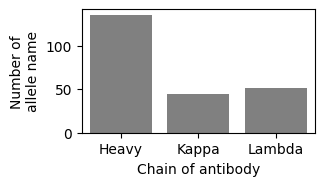

In [154]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).bar_allele_name(ax, params)

figure size: 8.5 x 5 cm
(14462, 19)


<Axes: xlabel='Chain of antibody', ylabel='Number of\nunique sequences'>

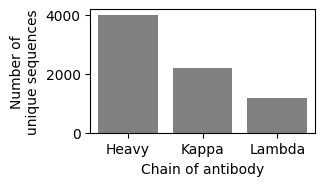

In [32]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).bar_chain_seq(ax, params)

figure size: 8.5 x 6 cm
(14462, 19)


<Axes: xlabel='Chain of antibody', ylabel='Length of AA'>

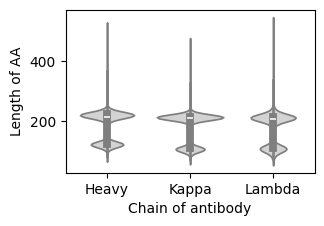

In [46]:
args = {'width_level': 1, 'height': 6}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).box_chain_len(ax, params)

figure size: 17.4 x 8 cm
(14354, 19)


<Axes: xlabel='Length of AA', ylabel='Count'>

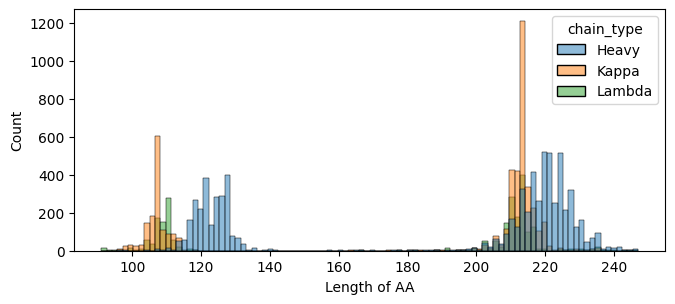

In [64]:
args = {'width_level': 3, 'height': 8}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens", 'bins': 100, 'min_len':90, 'max_len':250}
PlotSeq(df).hist_chain_len(ax, params)

figure size: 17.4 x 7 cm
Homo sapiens, number of pies: 6


<Axes: >

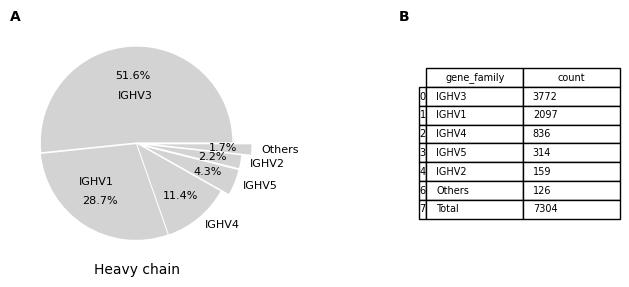

In [347]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Homo sapiens"
chain_type = 'Heavy'
key = 'gene_family'
n = 5
params = {'explode': [.01, .01, .01, .1, .1, .2], 'label_pos':{0: (-.2, .5), 1: (-.6, -.4)}}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

figure size: 8.5 x 10 cm


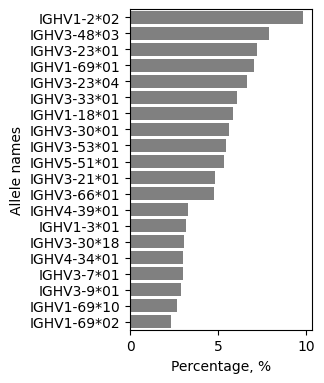

In [381]:
args = {'width_level': 1, 'height': 10}
fig, ax = Layout(args).one()

n = 20
params = {'ylabel': 'Allele names'}
ps.bar_specie_chain(ax, specie, chain_type, key, n, params)

figure size: 17.4 x 7 cm
Homo sapiens, number of pies: 6


<Axes: >

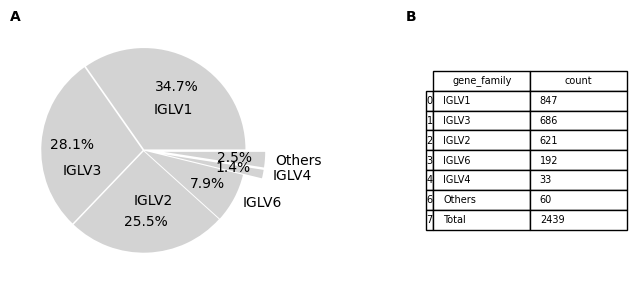

In [297]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Homo sapiens"
chain_type = 'Lambda'
key = 'gene_family'
n = 5
params = {'explode': [.01, .01, .01, .01, .2, .2], 'label_pos':{0: (.1, .4), 1: (-.8, -.2), 2: (-.1, -.5)}}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

figure size: 17.4 x 7 cm
Homo sapiens, number of pies: 6


<Axes: >

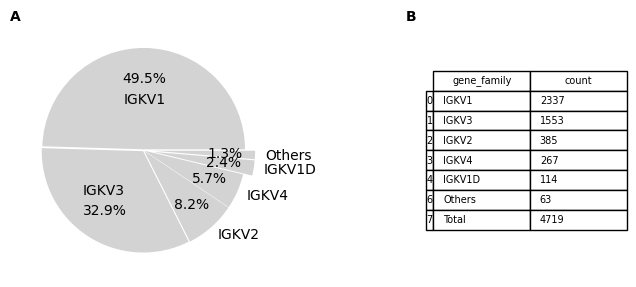

In [298]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Homo sapiens"
chain_type = 'Kappa'
key = 'gene_family'
n = 5
params = {'explode': [.01, .01, .01, .01, .1, .1],  'label_pos':{0: (-.2, .5), 1: (-.6, -.4)}}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

### mouse

figure size: 8.5 x 5 cm
(9073, 19)


<Axes: xlabel='Chain of antibody', ylabel='Number of\ngene family'>

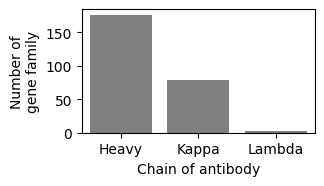

In [117]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).bar_gene_family(ax, params)

figure size: 8.5 x 5 cm
(9073, 19)


<Axes: xlabel='Chain of antibody', ylabel='Number of\nallele name'>

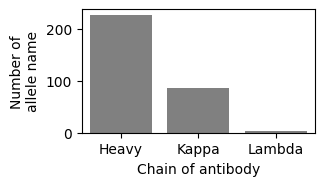

In [118]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).bar_allele(ax, params)

figure size: 8.5 x 5 cm
(9073, 19)


<Axes: xlabel='Chain of antibody', ylabel='Number of\nunique sequences'>

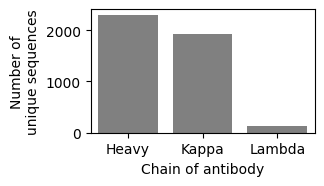

In [119]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).bar_chain_seq(ax, params)

figure size: 8.5 x 6 cm
(9073, 19)


<Axes: xlabel='Chain of antibody', ylabel='Length of AA'>

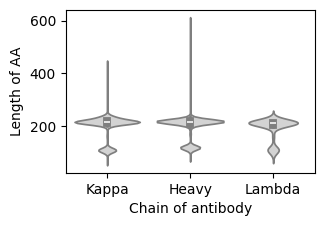

In [120]:
args = {'width_level': 1, 'height': 6}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).box_chain_len(ax, params)

figure size: 17.4 x 8 cm
(9033, 19)


<Axes: xlabel='Length of AA', ylabel='Count'>

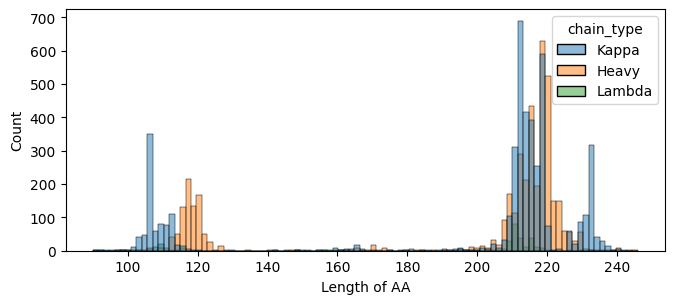

In [121]:
args = {'width_level': 3, 'height': 8}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus", 'bins': 100, 'min_len':90, 'max_len':250}
PlotSeq(df).hist_chain_len(ax, params)

figure size: 17.4 x 7 cm


<Axes: >

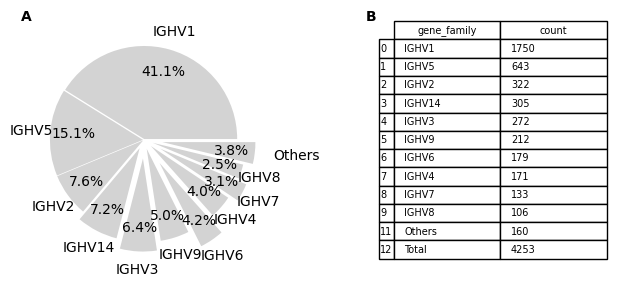

In [133]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Mus musculus"
chain_type = 'Heavy'
key = 'gene_family'
n = 10
params = {
    'explode': [.01, .01, .01, .1, .2, .1, .3, .1, .2, .1, .2], 
    'angle':0, 'ha':'center', 'pctdistance':.75,
}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n, params)

figure size: 17.4 x 7 cm
number of pies: 3


<Axes: >

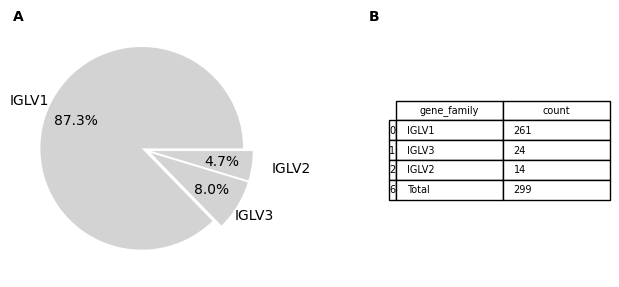

In [152]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Mus musculus"
chain_type = 'Lambda'
key = 'gene_family'
n = 5
params = {
    'explode': [.05, .05, .05], 
    'angle':0, 'ha':'center', 'pctdistance':.7,
}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n, params)

figure size: 17.4 x 7 cm
number of pies: 11


<Axes: >

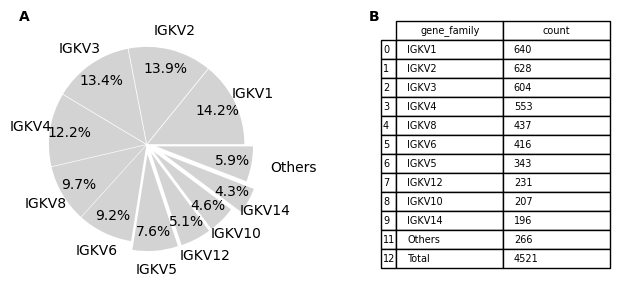

In [149]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Mus musculus"
chain_type = 'Kappa'
key = 'gene_family'
n = 10
params = {
    'explode': [.01, .01, .01, .01, .01, .01, .1, .1, .1, .2, .1], 
    'angle':0, 'ha':'center', 'pctdistance':.8,
}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n, params)

## figures

figure size: 11.4 x 8 cm


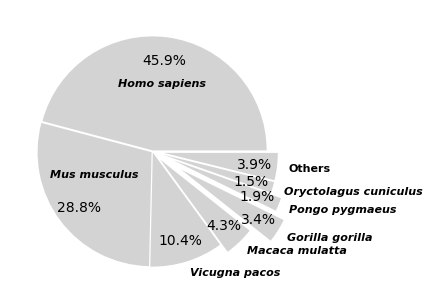

In [253]:
args = {'width_level': 2, 'height': 8}
fig, ax = Layout(args).one()

params = {'n': 7, 'explode': [.01, .01, .01, .1, .3, .2, .1, .1],
    'pctdistance':.8, 'labeldistance':1.1,}
PlotSeq(df, False).pie_specie_counts(ax, params)

fig.savefig('count_specie_antibody.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 5 cm


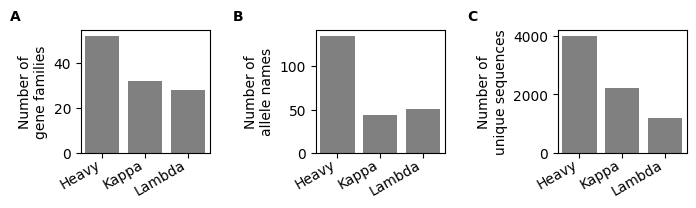

In [256]:
args = {'width_level': 3, 'height': 5, 'space':.1}
label_x = (-51, -60, -65)
label_y = 15
fig, axes = Layout(args).row(label_x, label_y)

ps = PlotSeq(df, False)
params = {'specie': "Homo sapiens"}
ps.bar_gene_family(axes[0], params)
ps.bar_allele_name(axes[1], params)
ps.bar_chain_seq(axes[2], params)

fig.savefig('human_chain_type.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 8 cm


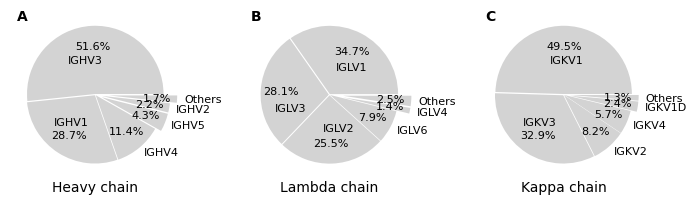

In [339]:
args = {'width_level': 3, 'height': 8, 'space':.1}
label_x = (5,) * 3
label_y = 0
fig, axes = Layout(args).row(label_x, label_y)

ps = PlotSeq(df, False)
specie = "Homo sapiens"
key = 'gene_family'
n = 5

chain_type = 'Heavy'
params = {'explode': [.01, .01, .01, .1, .1, .2], 'label_pos':{0: (-.4, .5), 1: (-.6, -.4)}}
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
chain_type = 'Lambda'
params = {'explode': [.01, .01, .01, .01, .2, .2], 'label_pos':{0: (.1, .4), 1: (-.8, -.2), 2: (-.1, -.5)}}
ps.pie_specie_chain(axes[1], specie, chain_type, key, n, params)
chain_type = 'Kappa'
params = {'explode': [.01, .01, .01, .01, .1, .1],  'label_pos':{0: (-.2, .5), 1: (-.6, -.4)}}
ps.pie_specie_chain(axes[2], specie, chain_type, key, n, params)

fig.savefig('human_imgt_gene_family.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 10 cm


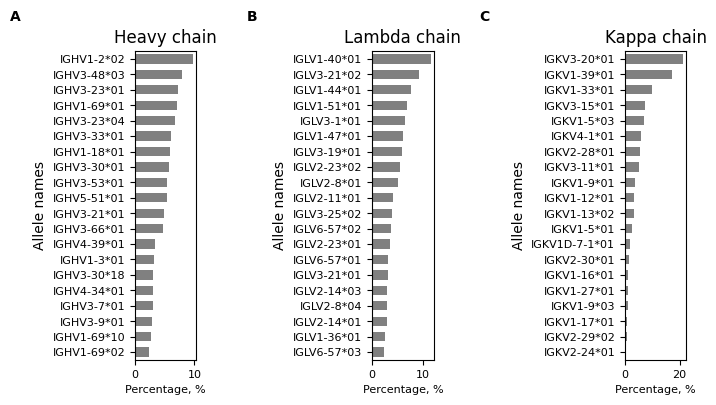

In [406]:
args = {'width_level': 3, 'height': 10, 'space':.2}
label_x = (-90, -90, -105)
label_y = 30
fig, axes = Layout(args).row(label_x, label_y)

ps = PlotSeq(df, False)
specie = "Homo sapiens"
key = 'allele_name'
n = 20
params = {'ylabel': 'Allele names', 'bar_width':.6}

chain_type = 'Heavy'
ps.bar_specie_chain(axes[0], specie, chain_type, key, n, params)
chain_type = 'Lambda'
ps.bar_specie_chain(axes[1], specie, chain_type, key, n, params)
chain_type = 'Kappa'
ps.bar_specie_chain(axes[2], specie, chain_type, key, n, params)

fig.savefig(f'human_imgt_{key}.tif', dpi=300, bbox_inches='tight', pad_inches=.05)